# Data Augmentation
Data Augmentation occurs when you create new data based on the modification 
be images. Data augmentation on images would include transformations like:
 - Flipping the image either horizontally or vertically
 - Rotating the image
 - Zooming in or out of the image
 - Cropping the image
 - Varying the color of the image

In [50]:
import matplotlib.pyplot as plt
import numpy as np
import os
import random
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
%matplotlib inline

In [51]:
# This function will plot images in the form of a grid with 1 row and 10 columns where images are placed
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

In [52]:
gen = ImageDataGenerator(rotation_range=10, width_shift_range=0.1, 
                        height_shift_range=0.1, shear_range=0.15, zoom_range=0.1,
                        channel_shift_range=10, horizontal_flip=True)

In [53]:
chosen_image = random.choice(os.listdir("/kaggle/input/cats-vs-dogs/train/dog"))

In [54]:
image_path = "/kaggle/input/cats-vs-dogs/train/dog/" + chosen_image

In [55]:
assert os.path.isfile(image_path)


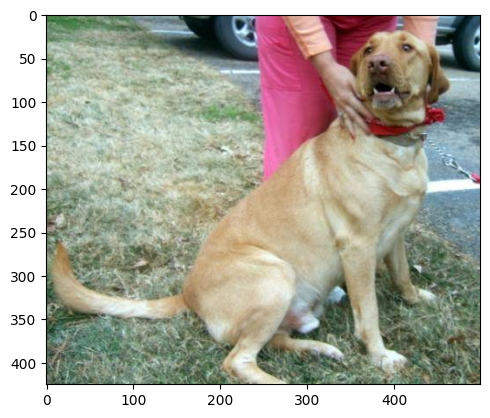

In [56]:
# Obtain image
image = np.expand_dims(plt.imread(image_path), 0)
plt.imshow(image[0])

In [57]:
# Generate batches of augmented images  from this image
aug_iter = gen.flow(image)

In [58]:
# Get 10 samples of augmented images
aug_images = [next(aug_iter)[0].astype(np.uint8) for _ in range(10)]

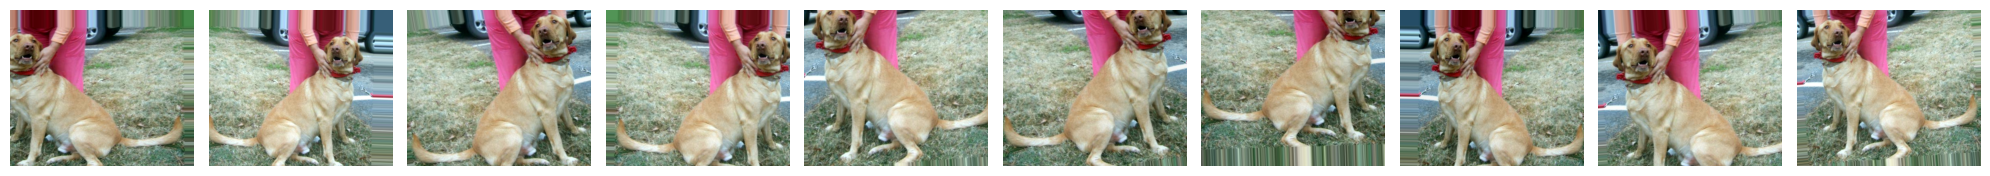

In [59]:
# Augmented images
plotImages(aug_images)